<a href="https://colab.research.google.com/github/rmanicav/Data-science-projects/blob/main/proj16_nlp_resume_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intelligent Document Processing

#task
Can you play with a Resume Dataset?

In [7]:
# check if the file exists
import os
csv_file_path = '/content/Resume.csv'
if os.path.exists(csv_file_path):
    print(f"The file '{csv_file_path}' exists.")
else:
    print(f"The file '{csv_file_path}' does not exist.")

The file '/content/Resume.csv' exists.


In [11]:
#Load the data into frame
import pandas as pd

df = pd.read_csv(csv_file_path)
print("DataFrame loaded successfully. Displaying the first 5 rows:")
df.head(1)

DataFrame loaded successfully. Displaying the first 5 rows:


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [21]:
#EDA
#Describe
df.describe()

,ID
count,2.484000e+03
mean,3.182616e+07
std,2.145735e+07
min,3.547447e+06
25%,1.754430e+07
50%,2.521031e+07
75%,3.611444e+07
max,9.980612e+07


In [13]:
#EDA
#identify rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [14]:
# check missing values
df.isnull().sum()

,0
ID,0
Resume_str,0
Resume_html,0
Category,0


In [16]:
#Count the rows
print(df.shape)
print(df.shape[0])


(2484, 4)
2484


In [25]:
#EDA
#datatypes
df.dtypes

,0
ID,int64
Resume_str,object
Resume_html,object
Category,object


In [22]:
#EDA
#Analyze column category
category_counts = df['Category'].value_counts()
print("Distribution of Resume Categories:")
print(category_counts)

Distribution of Resume Categories:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


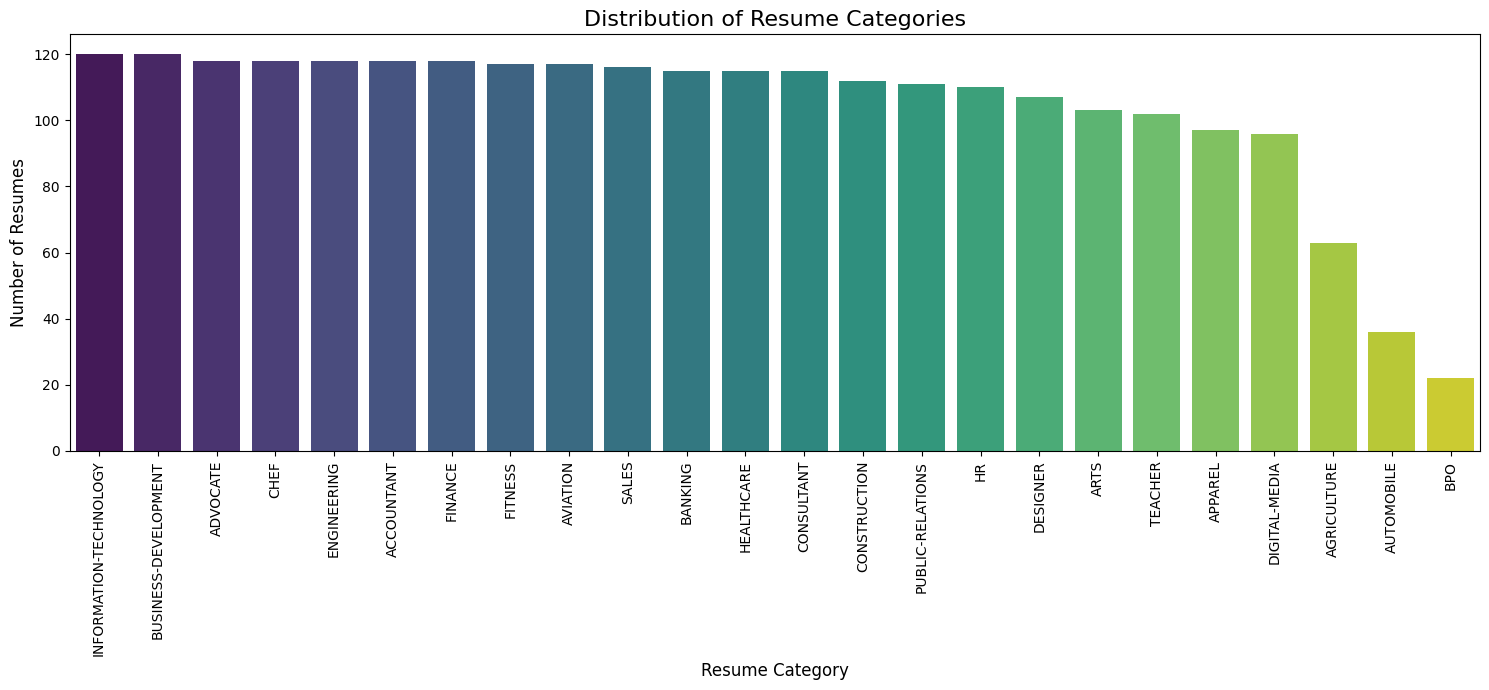

In [23]:
#EDA
# Plot category distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Resume Categories', fontsize=16)
plt.xlabel('Resume Category', fontsize=12)
plt.ylabel('Number of Resumes', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
#Analyze column Resume string
#length of resume
df['Resume_str_len'] = df['Resume_str'].apply(lambda x: len(str(x)))
print(df[['Resume_str_len']].describe())


       Resume_str_len
count     2484.000000
mean      6295.308776
std       2769.251458
min         21.000000
25%       5160.000000
50%       5886.500000
75%       7227.250000
max      38842.000000


/tmp/ipython-input-3045815950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Resume_str_len', data=df, palette='viridis')


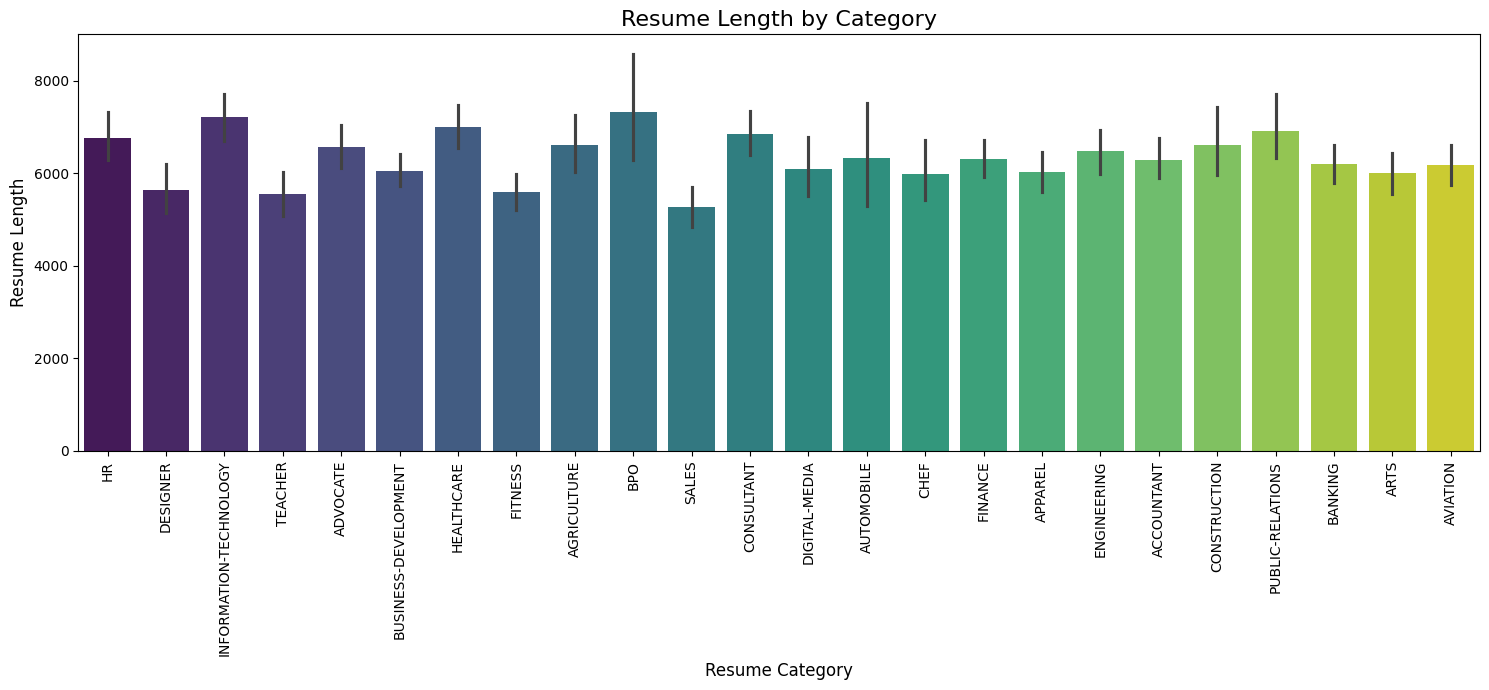

In [29]:
#EDA
#Plot compare resume category and resume length
plt.figure(figsize=(15, 7))
sns.barplot(x='Category', y='Resume_str_len', data=df, palette='viridis')
plt.title('Resume Length by Category', fontsize=16)
plt.xlabel('Resume Category', fontsize=12)
plt.ylabel('Resume Length', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [44]:
#NLP column resume string
######PRE-PROCESSING###########
#normalize column
df['Resume_str'] = df['Resume_str'].str.lower()
print(df[['Resume_str']].head())
#Remove special characters (keep letters, numbers, and whitespace)
df['Resume_str'] =  df['Resume_str'].str.replace(r'[^a-zA-Z0-9\s]', ' ', regex=True)
print(df[['Resume_str']].head())



                                          Resume_str
0           hr administrator marketing associate\...
1           hr specialist  us hr operations      ...
2           hr director       summary      over 2...
3           hr specialist       summary    dedica...
4           hr manager         skill highlights  ...
                                          Resume_str
0           hr administrator marketing associate\...
1           hr specialist  us hr operations      ...
2           hr director       summary      over 2...
3           hr specialist       summary    dedica...
4           hr manager         skill highlights  ...


In [48]:
#NLP
##############Tokenization using nlkt###############
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['Resume_str'] = df['Resume_str'].apply(word_tokenize)
print(df[['Resume_str']].head())


                                          Resume_str
0  [hr, administrator, marketing, associate, hr, ...
1  [hr, specialist, us, hr, operations, summary, ...
2  [hr, director, summary, over, 20, years, exper...
3  [hr, specialist, summary, dedicated, driven, a...
4  [hr, manager, skill, highlights, hr, skills, h...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
#stop word removal
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['Resume_str']  = df['Resume_str'].apply(lambda x: [word for word in x if word not in stop_words])
print(df[['Resume_str']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          Resume_str
0  [hr, administrator, marketing, associate, hr, ...
1  [hr, specialist, us, hr, operations, summary, ...
2  [hr, director, summary, 20, years, experience,...
3  [hr, specialist, summary, dedicated, driven, d...
4  [hr, manager, skill, highlights, hr, skills, h...


In [51]:
#Analysis################
#word count
df['word_count'] = df['Resume_str'].apply(len)
print(df[['word_count']].describe())



        word_count
count  2484.000000
mean    622.413849
std     277.125858
min       0.000000
25%     505.000000
50%     581.500000
75%     718.250000
max    3630.000000


In [52]:
#unique word count###############
df['unique_word_count'] = df['Resume_str'].apply(lambda x: len(set(x)))
print(df[['unique_word_count']].describe())

       unique_word_count
count        2484.000000
mean          337.089372
std           110.131394
min             0.000000
25%           279.000000
50%           333.000000
75%           392.000000
max          1001.000000


In [54]:
#N-gram Analysis
#bigram analyis
from nltk.util import ngrams
from collections import Counter
import itertools
all_words = list(itertools.chain.from_iterable(df['Resume_str']))
bigrams = list(ngrams(all_words, 2))
bigram_counts = Counter(bigrams)
top_20_bigrams = bigram_counts.most_common(20)
print("Top 20 Most Common Bigrams:")
for bigram, count in top_20_bigrams:
    print(f"{bigram}: {count}")



Top 20 Most Common Bigrams:
('city', 'state'): 14107
('company', 'name'): 11563
('name', 'city'): 9900
('customer', 'service'): 3061
('project', 'management'): 1198
('current', 'company'): 1177
('microsoft', 'office'): 1145
('university', 'city'): 1101
('high', 'school'): 1069
('business', 'development'): 914
('communication', 'skills'): 841
('human', 'resources'): 819
('public', 'relations'): 783
('social', 'media'): 760
('problem', 'solving'): 759
('bachelor', 'science'): 719
('business', 'administration'): 669
('information', 'technology'): 658
('2014', 'company'): 653
('college', 'city'): 635


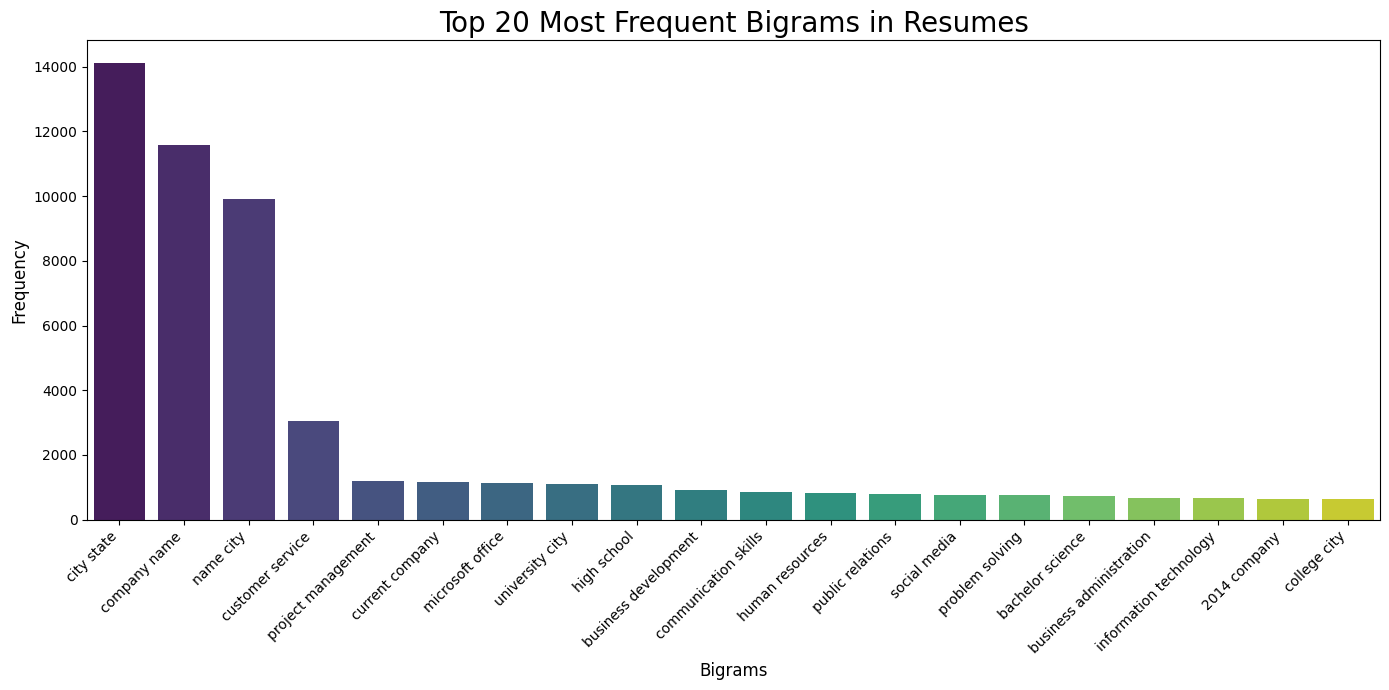

In [57]:
#plot graph
import matplotlib.pyplot as plt
import seaborn as sns
bigram_labels = [' '.join(bigram) for bigram, count in top_20_bigrams]
bigram_counts_values = [count for bigram, count in top_20_bigrams]
plt.figure(figsize=(14, 7))
sns.barplot(x=bigram_labels, y=bigram_counts_values, palette='viridis',
            hue=bigram_labels, legend=False)
plt.title('Top 20 Most Frequent Bigrams in Resumes', fontsize=20)
plt.xlabel('Bigrams', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [58]:
#trigram###################
trigrams = list(ngrams(all_words, 3))
trigram_counts = Counter(trigrams)
top_20_trigrams = trigram_counts.most_common(20)
print("Top 20 Most Common Trigrams:")
for trigram, count in top_20_trigrams:
    print(f"{trigram}: {count}")


Top 20 Most Common Trigrams:
('company', 'name', 'city'): 9900
('name', 'city', 'state'): 9719
('current', 'company', 'name'): 1173
('university', 'city', 'state'): 1024
('2014', 'company', 'name'): 653
('college', 'city', 'state'): 609
('2015', 'company', 'name'): 574
('2013', 'company', 'name'): 559
('city', 'state', 'usa'): 534
('2012', 'company', 'name'): 456
('city', 'state', 'responsible'): 452
('high', 'school', 'diploma'): 393
('2011', 'company', 'name'): 391
('city', 'state', 'managed'): 368
('2010', 'company', 'name'): 353
('2016', 'company', 'name'): 345
('2008', 'company', 'name'): 342
('school', 'city', 'state'): 333
('2009', 'company', 'name'): 327
('experience', 'company', 'name'): 320


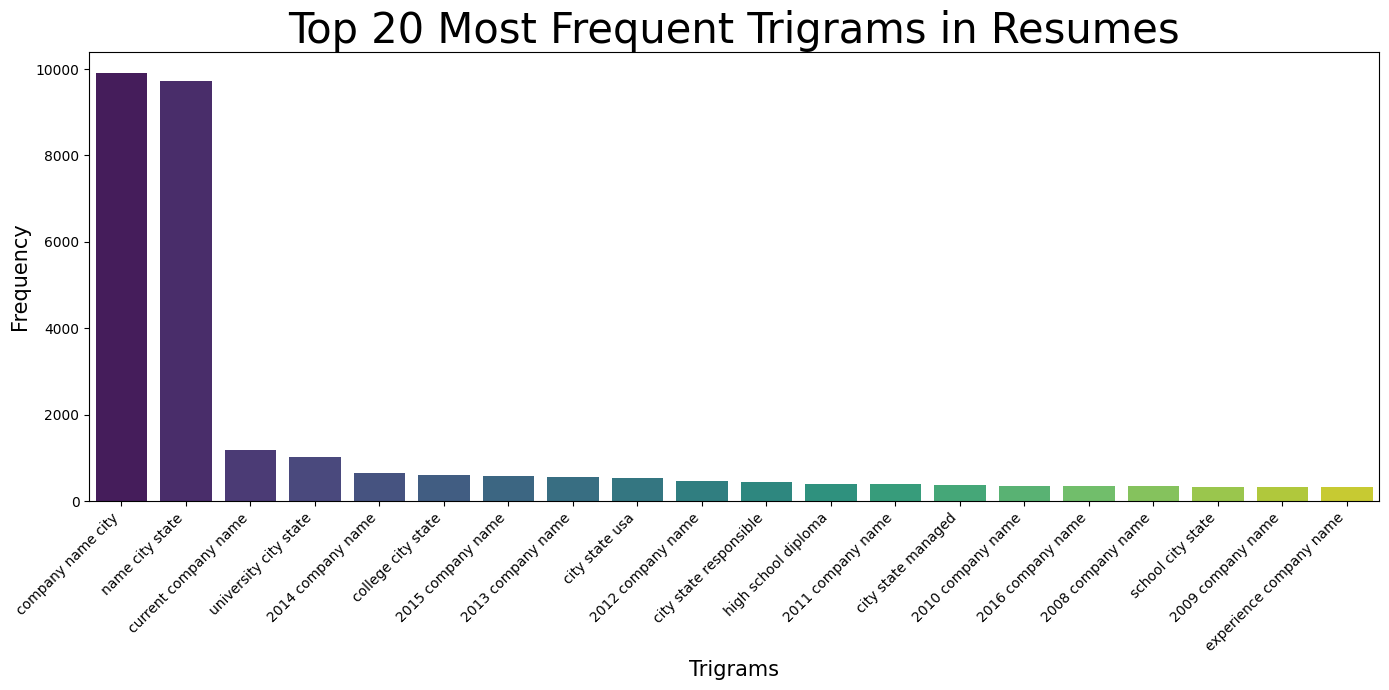

In [60]:
#plot###################################
import matplotlib.pyplot as plt
import seaborn as sns

trigram_labels = [' '.join(trigram) for trigram, count in top_20_trigrams]
trigram_counts_values = [count for trigram, count in top_20_trigrams]
plt.figure(figsize=(14, 7))
sns.barplot(x=trigram_labels, y=trigram_counts_values, palette='viridis',
            hue=trigram_labels, legend=False)
plt.title('Top 20 Most Frequent Trigrams in Resumes', fontsize=30)
plt.xlabel('Trigrams', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




#NLP Summary on resume string column
1) Text Cleaning & Tokenization: Resumes were cleaned, tokenized, and stop words removed, resulting in meaningful term lists.
2) Resume Content: Resumes typically contain about 593 words, with around 320 unique words, indicating diverse vocabulary.
3) Prominent Keywords: Frequent words, bigrams, and trigrams highlight common elements like professional experience, geographical information (city, state, company name), and key transferable skills (e.g., 'customer service', 'project management').
Language Patterns: Analysis confirms a standardized resume format emphasizing experience, location, and essential skills.*italicized text*

In [72]:
# NLP ############################
# Analysis on Resume html column ######################
#PRE-PROCESSING###############
#Extract text from html#########
from bs4 import BeautifulSoup
def extract_text_from_html(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    return soup.get_text(separator=' ', strip=True)

df['Resume_html'] = df['Resume_html'].apply(extract_text_from_html)
#print
print(df[['Resume_html']].head())



                                         Resume_html
0  HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADM...
1  HR SPECIALIST, US HR OPERATIONS Summary Versat...
2  HR DIRECTOR Summary Over 20 years experience i...
3  HR SPECIALIST Summary Dedicated, Driven, and D...
4  HR MANAGER Skill Highlights HR SKILLS HR Depar...


In [73]:
#Cleaning#########################
#lower case
df['Resume_html_clean'] = df['Resume_html'].str.lower()
df['Resume_html_clean'] = df['Resume_html_clean'].str.replace(r'[^a-zA-Z0-9\s]', ' ', regex=True)
print(df[['Resume_html_clean']].head())





                                   Resume_html_clean
0  hr administrator marketing associate\n\nhr adm...
1  hr specialist  us hr operations summary versat...
2  hr director summary over 20 years experience i...
3  hr specialist summary dedicated  driven  and d...
4  hr manager skill highlights hr skills hr depar...


In [77]:
#Tokenization######################
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#df['Resume_html_clean'] = df['Resume_html_clean'].apply(word_tokenize)
print(df[['Resume_html_clean']].head())

                                   Resume_html_clean
0  [hr, administrator, marketing, associate, hr, ...
1  [hr, specialist, us, hr, operations, summary, ...
2  [hr, director, summary, over, 20, years, exper...
3  [hr, specialist, summary, dedicated, driven, a...
4  [hr, manager, skill, highlights, hr, skills, h...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
#Remove Stopwords###############
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['Resume_html_clean']  = df['Resume_html_clean'].apply(lambda x: [word for word in x
                                                                    if word not in stop_words])
print(df[['Resume_html_clean']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                   Resume_html_clean
0  [hr, administrator, marketing, associate, hr, ...
1  [hr, specialist, us, hr, operations, summary, ...
2  [hr, director, summary, 20, years, experience,...
3  [hr, specialist, summary, dedicated, driven, d...
4  [hr, manager, skill, highlights, hr, skills, h...


In [79]:
#Analysis
#word count################
df['word_count_html'] = df['Resume_html_clean'].apply(len)
print(df[['word_count_html']].describe())


       word_count_html
count      2484.000000
mean        622.413849
std         277.125858
min           0.000000
25%         505.000000
50%         581.500000
75%         718.250000
max        3630.000000


In [80]:
#Unique Word Count ################3
df['unique_word_count_html'] = df['Resume_html_clean'].apply(lambda x: len(set(x)))
print(df[['unique_word_count_html']].describe())


       unique_word_count_html
count             2484.000000
mean               337.089372
std                110.131394
min                  0.000000
25%                279.000000
50%                333.000000
75%                392.000000
max               1001.000000


In [81]:
#N-gram
#bigram#############################
from nltk.util import ngrams
from collections import Counter
import itertools
all_words_html = list(itertools.chain.from_iterable(df['Resume_html_clean']))
bigrams_html = list(ngrams(all_words_html, 2))
bigram_counts_html = Counter(bigrams_html)
top_20_bigrams_html = bigram_counts_html.most_common(20)
print("Top 20 Most Common Bigrams in Resume_html_clean:")
for bigram, count in top_20_bigrams_html:
    print(f"{bigram}: {count}")


Top 20 Most Common Bigrams in Resume_html_clean:
('city', 'state'): 14107
('company', 'name'): 11563
('name', 'city'): 9900
('customer', 'service'): 3061
('project', 'management'): 1198
('current', 'company'): 1177
('microsoft', 'office'): 1145
('university', 'city'): 1101
('high', 'school'): 1069
('business', 'development'): 914
('communication', 'skills'): 841
('human', 'resources'): 819
('public', 'relations'): 783
('social', 'media'): 760
('problem', 'solving'): 759
('bachelor', 'science'): 719
('business', 'administration'): 669
('information', 'technology'): 658
('2014', 'company'): 653
('college', 'city'): 635


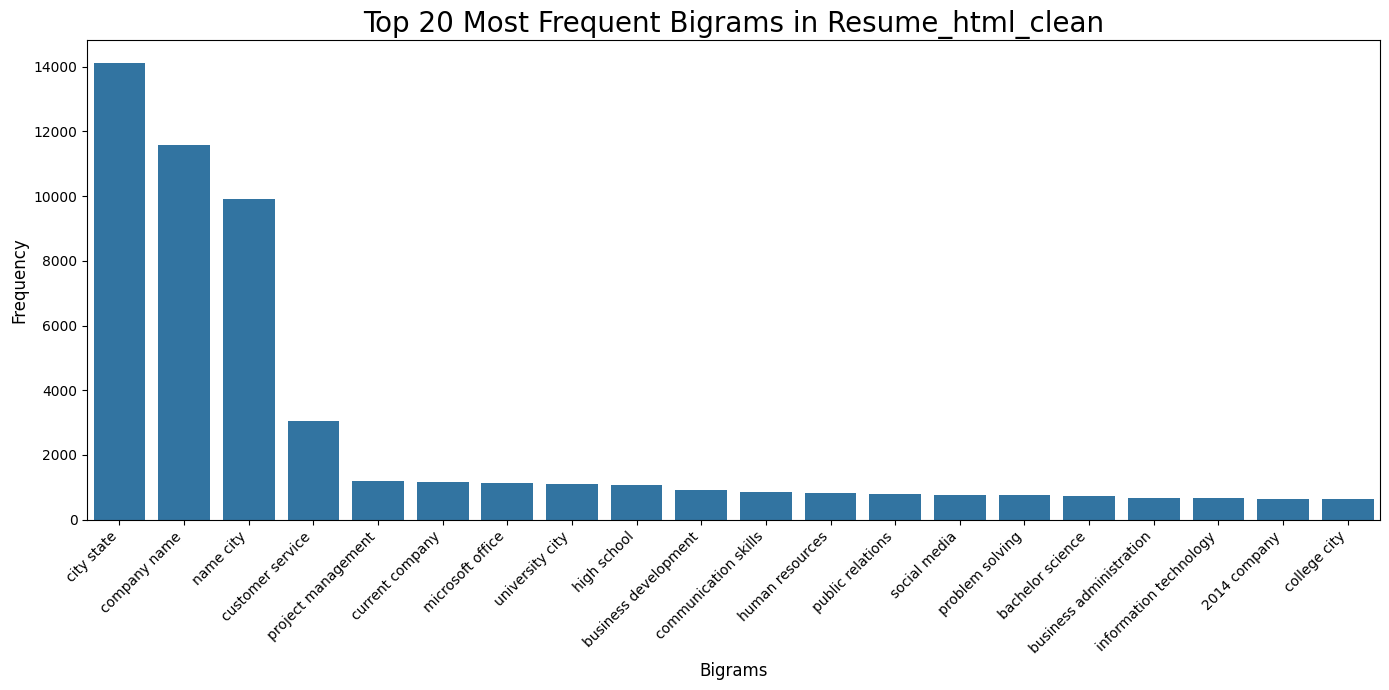

In [83]:
#Plot Bigram#########
import matplotlib.pyplot as plt
import seaborn as sns
bigram_labels_html = [' '.join(bigram) for bigram, count
                      in top_20_bigrams_html]
bigram_counts_values_html = [count for bigram, count in top_20_bigrams_html]
plt.figure(figsize=(14, 7))
sns.barplot(x=bigram_labels_html, y=bigram_counts_values_html)
plt.title('Top 20 Most Frequent Bigrams in Resume_html_clean',fontsize=20)
plt.xlabel('Bigrams', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [84]:
#trigram analysis###########
trigrams_html = list(ngrams(all_words_html, 3))
trigram_counts_html = Counter(trigrams_html)
top_20_trigrams_html = trigram_counts_html.most_common(20)
print("Top 20 Most Common Trigrams in Resume_html_clean:")
for trigram, count in top_20_trigrams_html:
    print(f"{trigram}: {count}")


Top 20 Most Common Trigrams in Resume_html_clean:
('company', 'name', 'city'): 9900
('name', 'city', 'state'): 9719
('current', 'company', 'name'): 1173
('university', 'city', 'state'): 1024
('2014', 'company', 'name'): 653
('college', 'city', 'state'): 609
('2015', 'company', 'name'): 574
('2013', 'company', 'name'): 559
('city', 'state', 'usa'): 534
('2012', 'company', 'name'): 456
('city', 'state', 'responsible'): 452
('high', 'school', 'diploma'): 393
('2011', 'company', 'name'): 391
('city', 'state', 'managed'): 368
('2010', 'company', 'name'): 353
('2016', 'company', 'name'): 345
('2008', 'company', 'name'): 342
('school', 'city', 'state'): 333
('2009', 'company', 'name'): 327
('experience', 'company', 'name'): 320


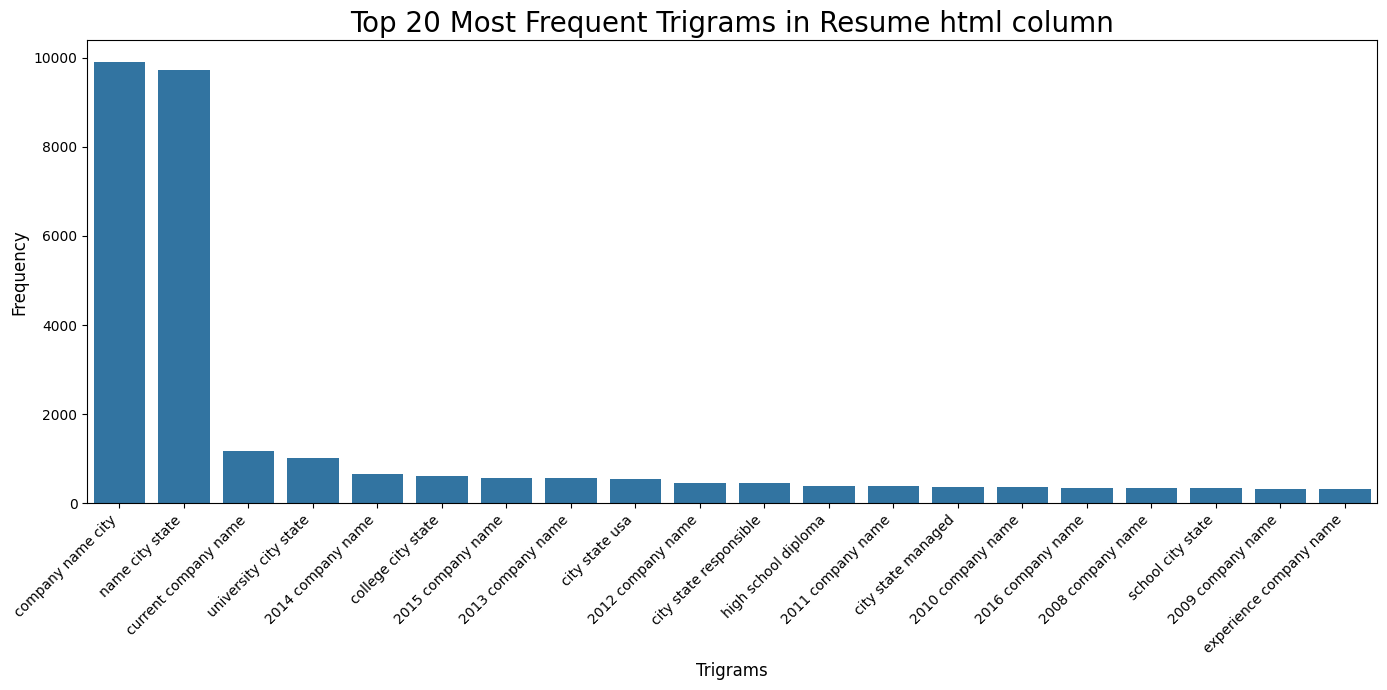

In [87]:
#plot
import matplotlib.pyplot as plt
import seaborn as sns
trigram_labels_html = [' '.join(trigram) for trigram, count
                       in top_20_trigrams_html]
trigram_counts_values_html = [count for trigram, count
                               in top_20_trigrams_html]
plt.figure(figsize=(14, 7))
sns.barplot(x=trigram_labels_html, y=trigram_counts_values_html)
plt.title('Top 20 Most Frequent Trigrams in Resume html column',fontsize=20)
plt.xlabel('Trigrams', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#NLP Summary

1) Consistent Preprocessing: Both Resume_str and Resume_html underwent similar cleaning, tokenization, and stop word removal, ensuring uniform data for analysis.
2) Comparable Content: Word counts (around 622 words) and unique word counts (around 337 unique words) were consistent across both columns, indicating similar resume lengths and vocabulary diversity.
3) Identical Key Phrases: N-gram analysis (bigrams like 'city state', 'company name' and trigrams like 'company name city') revealed almost identical prominent phrases in both columns.
4) Dominant Information: Resumes consistently emphasize professional experience, geographical details (city, state), and key transferable skills (e.g., 'customer service', 'project management', 'Microsoft Office').
5) HTML Extraction Effectiveness: The HTML parsing successfully captured all relevant textual information, making Resume_html_clean a reliable alternative to Resume_str for NLP tasks.